<a href="https://colab.research.google.com/github/navarro1113/Assigment/blob/main/Practica4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentación simple y segmentación óptima**

Carga de Imagen desde computadora

In [3]:
from google.colab import files

# Subir archivo desde tu computadora local
uploaded = files.upload()

Saving ImagenP4.jpg to ImagenP4 (1).jpg


# **Segmentación Sencilla**

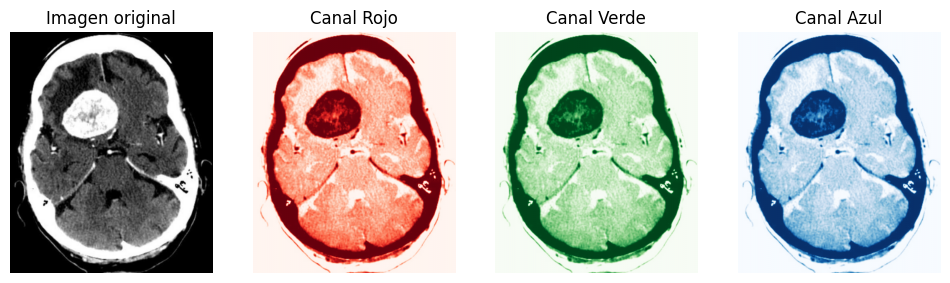

In [4]:
# Cargar imagen a color
img = cv2.imread('/content/ImagenP4.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR (OpenCV) a RGB

# Separar canales
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

# Mostrar los canales por separado
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(R, cmap='Reds')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(G, cmap='Greens')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(B, cmap='Blues')
plt.title('Canal Azul')
plt.axis('off')
plt.show()

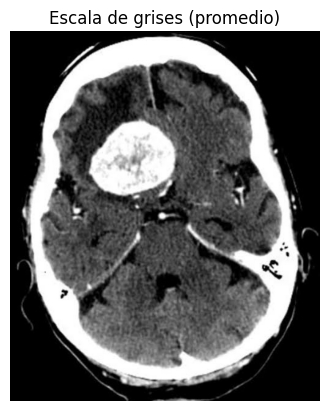

In [5]:
# Convertir a escala de grises promediando canales
gray_avg = ((R.astype(np.float32) + G + B) / 3).astype(np.uint8)

# Mostrar imagen en escala de grises
plt.imshow(gray_avg, cmap='gray')
plt.title('Escala de grises (promedio)')
plt.axis('off')
plt.show()

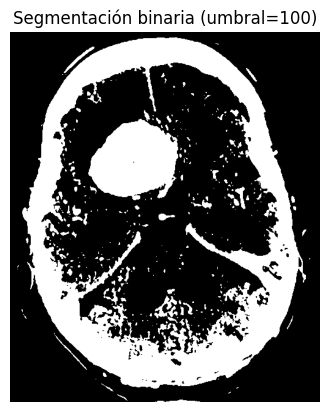

In [6]:
# Umbral para segmentación
umbral = 100
_, segmentada = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)

# Mostrar imagen segmentada
plt.imshow(segmentada, cmap='gray')
plt.title(f'Segmentación binaria (umbral={umbral})')
plt.axis('off')
plt.show()

# **Segmentación óptima**

Objetivo: Encontrar los coeficientes óptimos [w_𝑟, 𝑤_𝑔, 𝑤_𝑏] para convertir una imagen RGB a escala de grises usando:
*   Gris(i,j)=w_r​⋅R(i,j)+w_g⋅G(i,j)+w_b⋅B(i,j)
*   Bajo la restricción: w_𝑟 + 𝑤_𝑔 + 𝑤_𝑏 = 1
*   El criterio de optimización es: Maximizar la varianza de la imagen en escala de grises normalizada (mayor varianza ≡ mayor contraste).

In [8]:
# Cargar imagen y convertir de BGR a RGB
img = cv2.imread('/content/ImagenP4.jpg')  # Cambia el nombre de la imagen
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

In [9]:
# Normalizar canales entre 0 y 1
R_norm = R.astype(np.float32) / 255
G_norm = G.astype(np.float32) / 255
B_norm = B.astype(np.float32) / 255

# Función objetivo: varianza negativa (porque minimize() minimiza)
def grayscale_variance(weights):
    w_r, w_g, w_b = weights
    gray = w_r * R_norm + w_g * G_norm + w_b * B_norm
    gray_normalized = (gray - gray.min()) / (gray.max() - gray.min())
    return -np.var(gray_normalized)  # Negativo para maximizar

# Restricción: suma de pesos debe ser 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Límites de cada peso: entre 0 y 1
bounds = [(0, 1), (0, 1), (0, 1)]

# Valor inicial
initial_weights = [0.33, 0.33, 0.34]

# Optimización
result = minimize(grayscale_variance, initial_weights, method='SLSQP',
                  bounds=bounds, constraints=constraints)

optimal_weights = result.x
print("Pesos óptimos:", optimal_weights)

Pesos óptimos: [0.33 0.33 0.34]


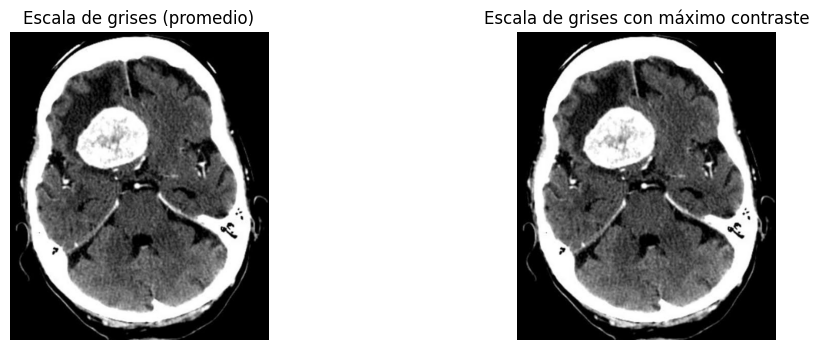

In [10]:
# Crear imagen en escala de grises con pesos óptimos
gray_optimal = optimal_weights[0] * R_norm + optimal_weights[1] * G_norm + optimal_weights[2] * B_norm
gray_optimal = (gray_optimal * 255).astype(np.uint8)

# Mostrar resultado
# Imagen obtenida de manera directa o sencilla
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_avg, cmap='gray')
plt.title('Escala de grises (promedio)')
plt.axis('off')

# Imagen obtenida de manera óptima
plt.subplot(1, 2, 2)
plt.imshow(gray_optimal, cmap='gray')
plt.title('Escala de grises con máximo contraste')
plt.axis('off')
plt.show()

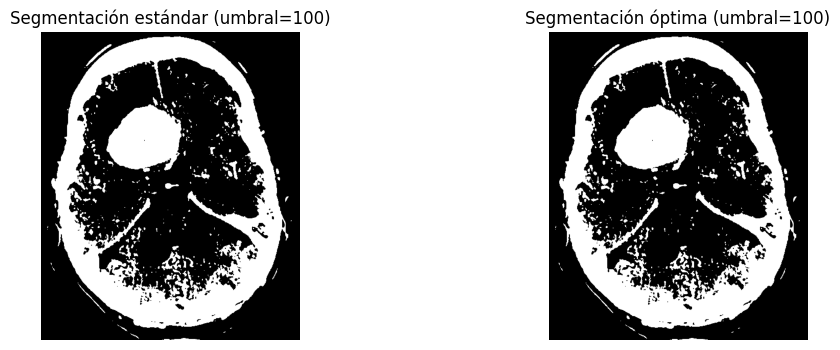

In [11]:
# Segmentar ambas imágenes con un mismo umbral
umbral = 100
_, seg_standard = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)
_, seg_optimal = cv2.threshold(gray_optimal, umbral, 255, cv2.THRESH_BINARY)

# Mostrar resultado
# Imagen obtenida de manera directa o sencilla
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(seg_standard, cmap='gray')
plt.title(f'Segmentación estándar (umbral={umbral})')
plt.axis('off')

# Imagen obtenida de manera óptima
plt.subplot(1, 2, 2)
plt.imshow(seg_optimal, cmap='gray')
plt.title(f'Segmentación óptima (umbral={umbral})')
plt.axis('off')
plt.show()

# **Método de optimización SLSQP (Sequential Least Squares Programming)**

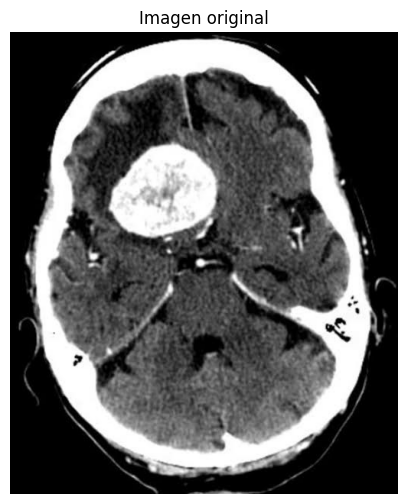

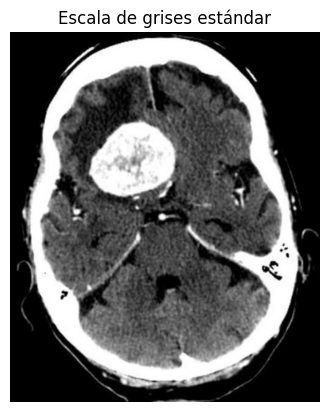

<ipython-input-12-03836df7ee45>:39: RuntimeWarning: overflow encountered in scalar negative
  return -np.sum(binarized * mask)  # Queremos maximizar el acierto


Pesos óptimos R,G,B: [0.33 0.33 0.34]


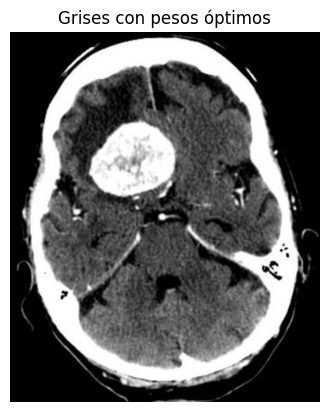

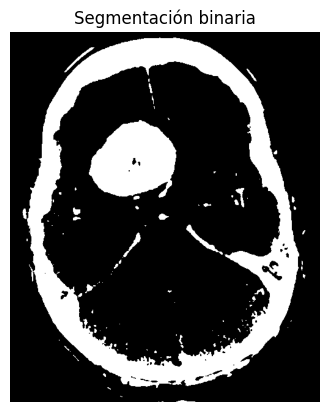

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from google.colab.patches import cv2_imshow

# 1. Cargar la imagen y convertir a RGB
img = cv2.imread('/content/ImagenP4.jpg')  # Asegúrate de que este sea el nombre correcto
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen original
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis("off")
plt.show()

# 2. Conversión estándar a escala de grises
img_gray_std = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(img_gray_std, cmap='gray')
plt.title("Escala de grises estándar")
plt.axis("off")
plt.show()

# 3. Definir función de pérdida para la optimización
def loss_function(weights, img, mask):
    # Normalizar pesos
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)

    # Convertir RGB a escala de grises usando los pesos
    gray_opt = np.dot(img.reshape(-1, 3), weights).reshape(img.shape[:2])
    threshold = 0.5 * (np.max(gray_opt) + np.min(gray_opt))
    binarized = (gray_opt > threshold).astype(np.uint8)

    # Métrica de comparación: diferencia respecto a la máscara esperada
    return -np.sum(binarized * mask)  # Queremos maximizar el acierto

# 4. Crear una máscara estimada (umbralado de referencia)
_, mask = cv2.threshold(img_gray_std, 100, 1, cv2.THRESH_BINARY)

# 5. Optimización SLSQP
initial_weights = [0.33, 0.33, 0.34]
bounds = [(0, 1), (0, 1), (0, 1)]
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

res = minimize(loss_function, initial_weights, args=(img_rgb, mask),
               method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = res.x
print(f"Pesos óptimos R,G,B: {optimal_weights}")

# 6. Aplicar conversión óptima a escala de grises
gray_opt = np.dot(img_rgb.reshape(-1, 3), optimal_weights).reshape(img.shape[:2])
gray_opt = gray_opt.astype(np.uint8)

plt.figure()
plt.imshow(gray_opt, cmap='gray')
plt.title("Grises con pesos óptimos")
plt.axis("off")
plt.show()

# 7. Umbralado para segmentar (con Otsu)
_, segmented = cv2.threshold(gray_opt, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure()
plt.imshow(segmented, cmap='gray')
plt.title("Segmentación binaria")
plt.axis("off")
plt.show()

Una vez segmentada la imagen, eliminar el ruido de la misma. El resultado deberá mostrar principalmente el contorno del cráneo y el contorno del tumor.

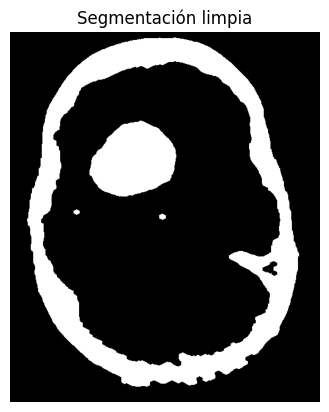

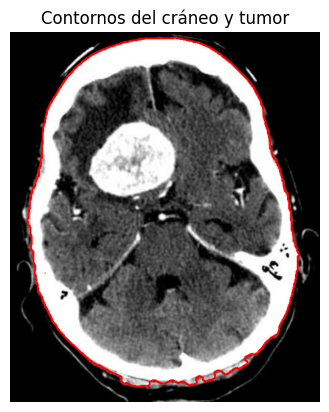

In [13]:
# 8. Eliminar ruido (morfología)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned = cv2.morphologyEx(segmented, cv2.MORPH_OPEN, kernel, iterations=2)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure()
plt.imshow(cleaned, cmap='gray')
plt.title("Segmentación limpia")
plt.axis("off")
plt.show()

# 9. Extraer contornos
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img_rgb.copy()
cv2.drawContours(img_contours, contours, -1, (255, 0, 0), 2)

plt.figure()
plt.imshow(img_contours)
plt.title("Contornos del cráneo y tumor")
plt.axis("off")
plt.show()

# **Cálculo del área del tumor**

In [14]:
# 10. Calcular área del tumor (asumimos que el contorno más pequeño es el tumor)
areas = [cv2.contourArea(c) for c in contours]
if areas:
    tumor_area = min(areas)
    print(f"Área estimada del tumor: {tumor_area:.2f} píxeles")
else:
    print("No se detectaron contornos.")

Área estimada del tumor: 198330.50 píxeles
